# Error Propagation For g

Simulation


In [24]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys       
import scipy

sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure



Analytical

  Mean = 9.088,    Std = 0.134


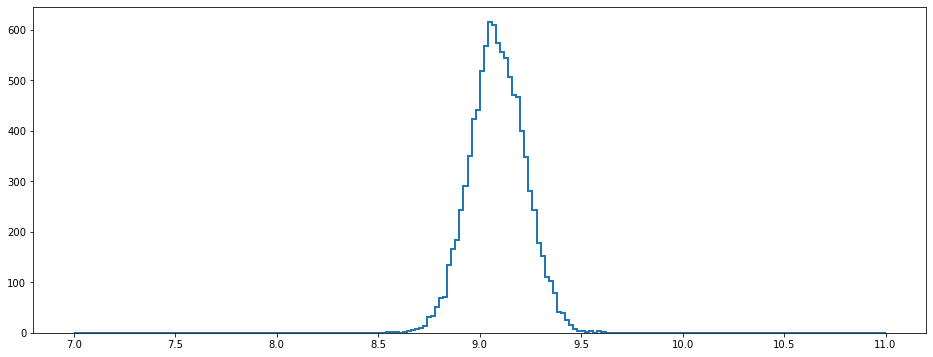

In [25]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys       
import scipy

sys.path.append('External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax # useful functions to print fit results on figure

# First we set the parameters of the program:
N_exp = 10000           # Number of "experiments" (i.e. drawing from random distributions)
save_plots = False
r = np.random
r.seed(42)


mua   =  1.58
siga  =  0.02
mutheta   =  0.266
sigtheta  =  0.002
mudb = 13.10
sigdb = 0.06
mudr = 6.13
sigdr = 0.01


a = r.normal(mua, siga, N_exp)
theta = r.normal(mutheta, sigtheta, N_exp)
db = r.normal(mudb, sigdb, N_exp)
dr = r.normal(mudr, sigdr, N_exp)

y_all=a/np.sin(theta)*(1+2/5*db**2/(db**2-dr**2))

nbins = 200
xmin, xmax = 7, 11
binwidth = (xmax-xmin)/nbins

fig2, ax2 = plt.subplots(figsize=(16, 6));
counts, bin_edges, _ = ax2.hist(y_all, nbins, range=(xmin, xmax), histtype='step', linewidth=2)
bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
s_counts = np.sqrt(counts)

mean = y_all.mean()
std = y_all.std(ddof=1)
print(f"  Mean = {mean:5.3f},    Std = {std:5.3f}")




In [26]:
# Import SymPy: 
from sympy import * 
from IPython.core.display import Latex

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)
    
    
# Define variables:
g,a,theta,dball,drail = symbols("g, a, theta, Dball, Drail ")
dg,da,dtheta,ddball,ddrail = symbols("sigma_g, sigma_a, sigma_theta, sigma_Dball, sigma_Drail")

# Perimeter:
# Define relation, and print:
g = a/sin(theta)*(1+2/5*dball**2/(dball**2-drail**2))

lprint(latex(Eq(symbols('g'),g)))

# Calculate uncertainty and print:
dg = sqrt((g.diff(a)*da)**2+(g.diff(theta)*dtheta)**2+(g.diff(dball)*ddball)**2+(g.diff(drail)*ddrail)**2)
lprint(latex(Eq(symbols('sigma_g'), dg)))

# Turn expression into numerical functions 
fg = lambdify((a,theta,dball,drail),g)
fdg = lambdify((a,theta,dball,drail,da,dtheta,ddball,ddrail),dg)

# Define values and their errors

va=mua
vda=siga
vtheta=mutheta
vdtheta=sigtheta
vdball=mudb
vddball=sigdb
vdrail=mudr
vddrail=sigdr



# Numerically evaluate expressions and print 
vg = fg(va,vtheta,vdball,vdrail)
vdg = fdg(va,vtheta,vdball,vdrail,vda,vdtheta,vddball,vddrail)
lprint(fr'g = ({vg:.1f} \pm {vdg:.1f})\,\mathrm{{m}}')



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>